## Implementing chatbot with  simple LangGraph

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END


#reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [5]:
class state(TypedDict):
    messages : Annotated[list,add_messages]

In [6]:
import os
from dotenv import load_dotenv


os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")



In [ ]:
# from langchain_openai import ChatOpenAI
# llm= ChatOpenAI(model="gpt-4o")
# llm.invodke("hello")

In [14]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="llama3-70b-8192")  

llm_groq.invoke("Hello, how are you?")
  




AIMessage(content="I'm just a language model, I don't have emotions or feelings like humans do, so I don't have good or bad days. I'm always ready to help you with any questions or tasks you may have! How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 16, 'total_tokens': 68, 'completion_time': 0.148571429, 'prompt_time': 0.000172817, 'queue_time': 0.054117663, 'total_time': 0.148744246}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--a5f751e0-21dd-4e02-aba1-0bc801bdd577-0', usage_metadata={'input_tokens': 16, 'output_tokens': 52, 'total_tokens': 68})

we will start creating nodes


In [15]:
def superbot(state: state):
    return {"messages": [llm_groq.invoke(state["messages"])]}


In [16]:
graph= StateGraph(state)

graph.add_node("superbot", superbot)

#edges
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder= graph.compile()




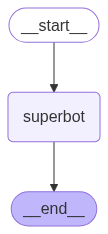

In [20]:
from IPython.display import display , Image
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [22]:
# invocation
graph_builder.invoke({'messages': "Hello, My name is pooja"})

{'messages': [HumanMessage(content='Hello, My name is pooja', additional_kwargs={}, response_metadata={}, id='c8149f1a-bae1-4da1-a694-0c581014903c'),
  AIMessage(content="Namaste Pooja! It's nice to meet you. I'm your AI assistant, here to chat and help with any questions or topics you'd like to discuss. How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 17, 'total_tokens': 61, 'completion_time': 0.125714286, 'prompt_time': 0.000252096, 'queue_time': 0.057920413999999996, 'total_time': 0.125966382}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--2ff2a8c4-b8db-473a-bae4-c9d6887782ab-0', usage_metadata={'input_tokens': 17, 'output_tokens': 44, 'total_tokens': 61})]}

Streaming the responses


In [ ]:
for event in graph_builder.stream({'messages': "Hello, My name is"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello, My name is', additional_kwargs={}, response_metadata={}, id='45ed41b2-ae23-4718-a1f4-41c57c4bc162')]}
{'messages': [HumanMessage(content='Hello, My name is', additional_kwargs={}, response_metadata={}, id='45ed41b2-ae23-4718-a1f4-41c57c4bc162'), AIMessage(content="Hello! It's nice to meet you. You were about to tell me your name, weren't you? Please go ahead and finish your sentence. I'm all ears!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 15, 'total_tokens': 51, 'completion_time': 0.139336213, 'prompt_time': 0.000217377, 'queue_time': 0.059466032, 'total_time': 0.13955359}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--2ac42d6c-e441-4239-9624-3c87194accd4-0', usage_metadata={'input_tokens': 15, 'output_tokens': 36, 'total_tokens': 51})]}
